# Method it used for fitting $C IV$ column density
## (Currently the package can only fit $C IV$ column density) 
<font size=5>

Note that there are two absorption lines of CIV which near each other, and as is often the case, the two lines are blended, so that we can't fit the single line. We should fit the two lines at the same time. For the two lines, we have:

$$d\tau_1=\frac{dI_1}{I},   d\tau_2=\frac{dI_2}{I}$$

Then:
    
$$d(\tau_1+\tau_2)=\frac{d(I_1+I_2)}{I}=\frac{dI'}{I}$$

Integrate across it:

$$\tau_1+\tau_2=-ln(I)$$

$$I=I_0e^{-\tau_1-\tau_2}$$

Then the normalized flux is:
    
$$I=e^{-\tau_1-\tau_2}$$

    
The relationship between optical depth and column density (In wavelength space) is: (referring to http://www.ucolick.org/~xavier/AY230/ay230_HILya.pdf)

$$ \tau_\lambda=\frac{\pi e^2}{m_ec^2}\lambda_{jk}^2f_{jk}\phi_\lambda N_j$$


We can then derive the formula with which I am going to fit $N_{C IV}$:
    
$$I(\lambda)=e^{-\frac{\pi e^2}{m_ec^2}(\lambda_1^2f_1\phi_1(\lambda) N_1+\lambda_2^2f_2\phi_2(\lambda) N_2)}$$

Taking the Vogit profile, the line-profile $\phi(\lambda)$ in wavelength space is :
    
$$\phi(\lambda)=\frac{c}{\lambda_{jk}\sigma \sqrt{2\pi}}H(a,u)$$
    
Where $H(a,u)$ is the Voigt function:

$$H(a,u)=\frac{a}{\pi}\int_{-\infty}^\infty\frac{e^{-y^2}dy}{a^2+(u-y)^2}$$
    
Identify:
    
$$a\equiv\frac{\gamma\lambda_{jk}}{4\pi\sqrt{2}\sigma}$$
    
$$u\equiv\frac{(\lambda^2-\lambda_{jk}^2)c}{(\lambda^2+\lambda_{jk}^2)\sqrt{2}\sigma}$$

Velocity dispersion: $$\sigma=\sqrt{\frac{kT}{m_A}}$$
    
Doppler parameter: $$b=\sqrt{2}\sigma$$
    
To avoid the intensive computation of the Voigt function, apply the analytical approximation (by Tepper-García (2006)):

$$H(a,u)\approx h-\frac{a}{\sqrt{\pi}u^2}(h^2(4u^4+7u^2+1.5u^{-2}+4)-1.5u^{-2}-1)$$
$$ h\equiv e^{-u^2}$$


    
The damping parameters $\gamma,f_{jk}$are from:
    
https://iopscience.iop.org/article/10.1086/382157/fulltext/datafile2.txt  and https://iopscience.iop.org/article/10.1086/382157/fulltext/datafile5.txt

Then we get: for $\lambda_1=1548.20 \overset{\circ}{A}, \gamma_1=2.643\times 10^8,f_1=0.189$, and for $\lambda_2=1550.77 \overset{\circ}{A}, \gamma_2=2.628\times 10^8,f_2=0.095$

In [1]:
from myfit.voigt import fit as ft

Welcome to use myfit!
version=0.1


Load the spectrum

Plotting Ly$\alpha$ line, wavelength =1215.67
Plotting C IV line, wavelength =1549.05
Plotting Al III line, wavelength =1857.40
Plotting C III] line, wavelength =1908.73
Plotting Mg II line, wavelength =2797.92
Plotting C II line, wavelength =1335.31
Plotting O IV] line, wavelength =1402.34


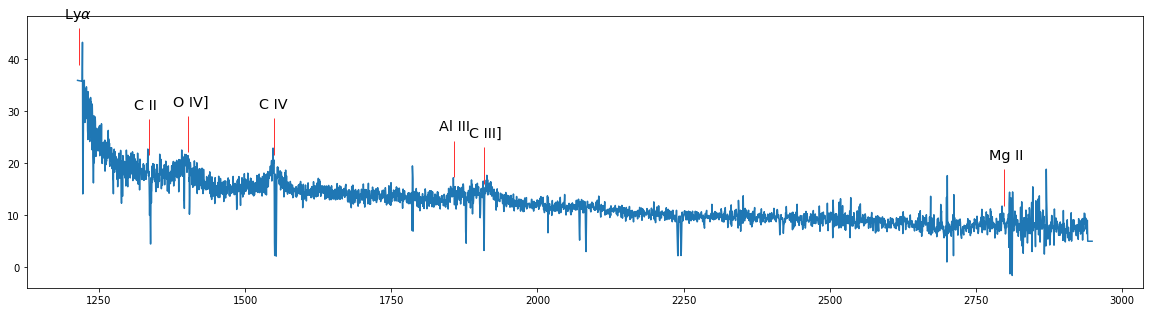

In [3]:
spec = ft.readdr7('dr7data\spSpec-53142-1697-627.fit')
ft.plotlines(spec,r'Ly$\alpha$','C IV','Al III','C III]','Mg II','C II','O IV]')

Fit the spectrum

lgN1= 15.405544274275227
lgN2= 15.532031076741763


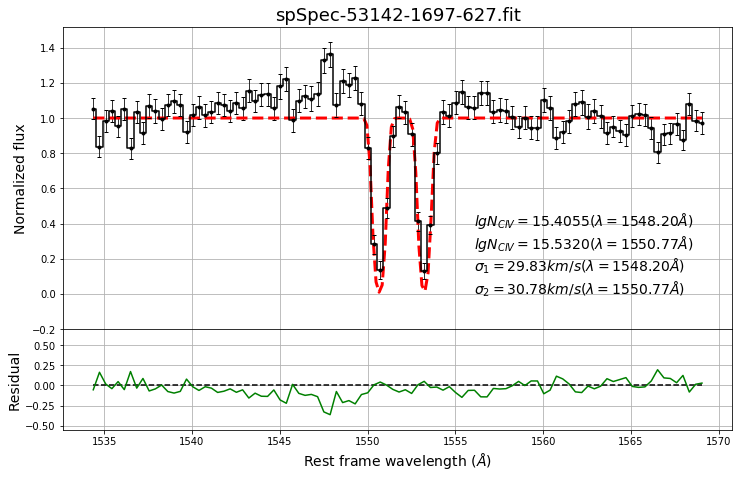

In [4]:
ft.compute_N(spec,'C IV')

Plotting Ly$\alpha$ line, wavelength =1215.67
Plotting C IV line, wavelength =1549.05


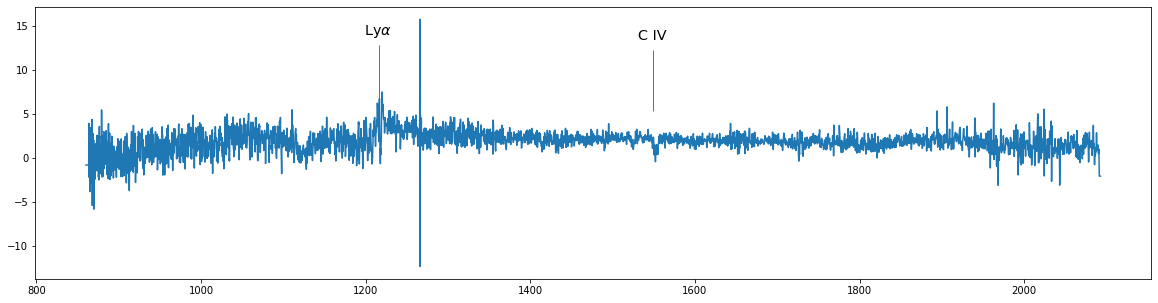

In [5]:
spec = ft.readdr7('dr7data\spSpec-53473-2108-438.fit')
ft.plotlines(spec,r'Ly$\alpha$','C IV')

lgN1= 15.104450255751159
lgN2= 15.03728313080004


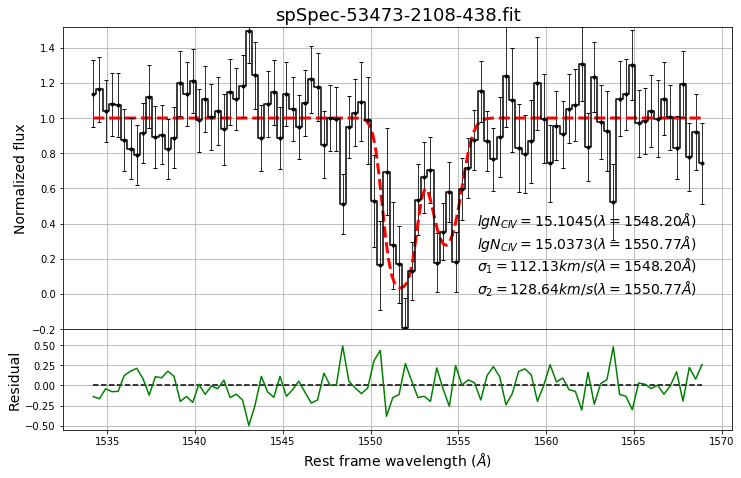

In [7]:
ft.compute_N(spec,'C IV')

Plotting O IV] line, wavelength =1402.34
Plotting C IV line, wavelength =1549.05


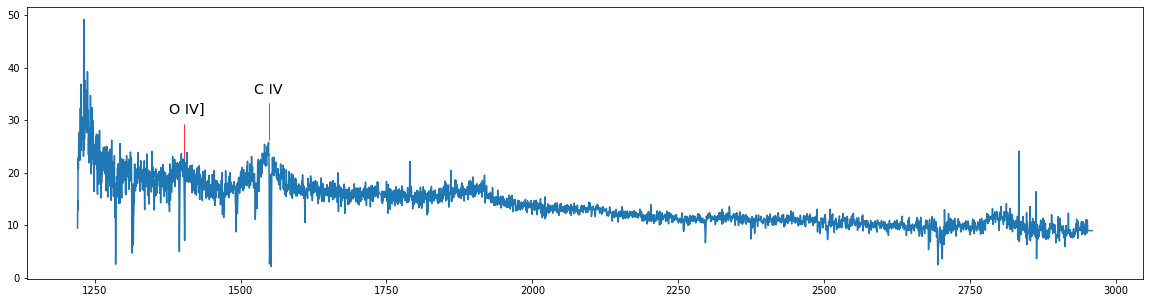

In [8]:
spec = ft.readdr7('dr7data\spSpec-53794-2353-135.fit')
ft.plotlines(spec,'O IV]','C IV')

lgN1=15.204062
lgN2=15.118172


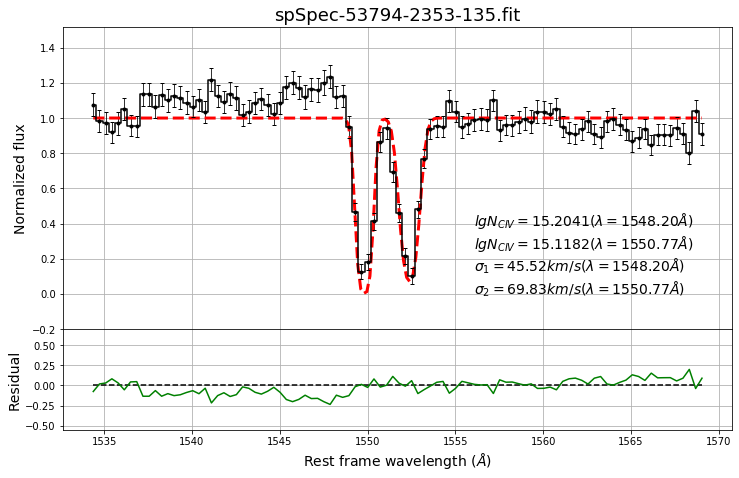

In [13]:
import imp
imp.reload(ft)
ft.compute_N(spec,'C IV')